<a href="https://colab.research.google.com/github/abhidhawale/MachineLearningProjects/blob/master/K_NearestNeighbors_Play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Implement K-Nearest Nneighbors Classifier on "Play" dataset

1. The target variable is **Play**
2. Split the data into training and testing parts :  80% for training and 20% for testing.
3. Check Accuracy and Confusion Matrix for the trained model
4. Make prediction for **Play** for feature matrix :
                          [1,2,2,1]   

In [ ]:
import pandas as pd

df = pd.read_csv('/content/dataset-41-1-play.csv')
df.head()

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes


##Preprocessing

In [ ]:
df.isna().sum()

outlook        0
temperature    0
humidity       0
windy          0
play           0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_val = df.columns
le = LabelEncoder()
for i in cat_val:
  df[i] = le.fit_transform(df[i])

df.head()

,outlook,temperature,humidity,windy,play
0,0,1,0,0,1
1,0,0,1,1,1
2,0,2,0,1,1
3,0,1,1,0,1
4,1,2,0,0,1


##Splitting data into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('play', axis=1)
y = df['play']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

##Training model on training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
mod = KNeighborsClassifier(n_neighbors = 3)

result= mod.fit(X_train, y_train)

In [ ]:
pred = result.predict(X_test)
pred

array([0, 1, 0])

##Checking accuracy and confusion matrix

In [ ]:
print('With KNN (K=3) accuracy is: ', result.score(X_test, y_test))

With KNN (K=3) accuracy is:  0.3333333333333333


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('With KNN (K=3) accuracy score is: ', accuracy_score(y_test, pred))

With KNN (K=3) accuracy score is:  0.3333333333333333


In [ ]:
conf_mat = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf_mat, index=['Actual 0', 'Actual 1'], columns=['Actual 0', 'Actual 1'])
conf_df

,Actual 0,Actual 1
Actual 0,1,1
Actual 1,1,0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


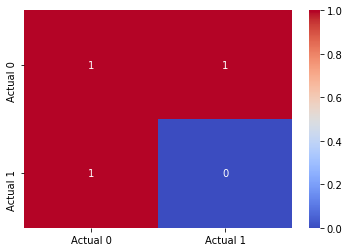

In [ ]:
import seaborn as sb
sb.heatmap(conf_df, cmap='coolwarm', annot=True)

##Deploying model

In [ ]:
new_pred = result.predict([[1,2,2,1]])
new_pred

array([1])